<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/7p_CV_ops_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!ls

sample_data  shaktiman.jpg


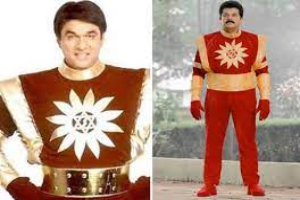

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
img = cv2.imread('shaktiman.jpg')
img = cv2.resize(img, (300,200))
cv2_imshow(img)

In [34]:
img  # nothing but numbers

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [177, 177, 177],
        [177, 177, 177],
        [180, 180, 180]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [181, 181, 181],
        [180, 180, 180],
        [180, 180, 180]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [187, 187, 187],
        [184, 184, 184],
        [181, 181, 181]],

       ...,

       [[252, 251, 255],
        [252, 251, 255],
        [252, 252, 255],
        ...,
        [170, 182, 204],
        [171, 182, 204],
        [169, 182, 204]],

       [[250, 252, 255],
        [250, 252, 255],
        [250, 253, 255],
        ...,
        [161, 171, 192],
        [164, 173, 195],
        [164, 175, 195]],

       [[246, 252, 255],
        [246, 252, 255],
        [247, 253, 255],
        ...,
        [163, 172, 191],
        [167, 174, 194],
        [167, 177, 195]]

In [24]:
kernel = np.ones((5,5), np.float32)  / (5*5)
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


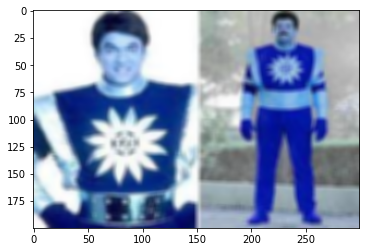

In [25]:
ddepth = -1
img_mod = cv2.filter2D(img, ddepth, kernel)
plt.imshow(img_mod)
#img_mod = cv2.filter2D(img_mod, ddepth, kernel)
#plt.imshow(img_mod)

In [ ]:
# different types of blurs https://quincemedia.com/2017/10/04/9-types-of-blur-effects-in-after-effects/ 

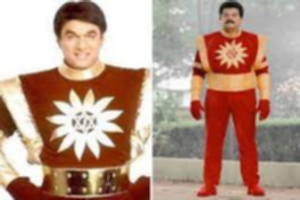

In [26]:
img_blur = cv2.blur(img, (3,3))

cv2_imshow(img_blur)

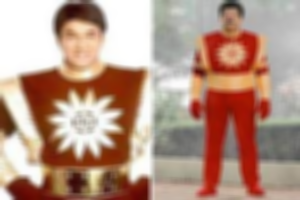

In [31]:
img_blur = cv2.blur(img, (7,7))

cv2_imshow(img_blur)

In [35]:
img_blur

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [185, 185, 185],
        [184, 184, 184],
        [184, 184, 184]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [185, 185, 185],
        [184, 184, 184],
        [184, 184, 184]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [185, 185, 185],
        [185, 185, 185],
        [185, 185, 185]],

       ...,

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 253],
        ...,
        [162, 173, 196],
        [162, 174, 196],
        [163, 174, 196]],

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 253],
        ...,
        [164, 175, 197],
        [164, 175, 197],
        [164, 175, 197]],

       [[251, 252, 255],
        [251, 252, 254],
        [252, 252, 253],
        ...,
        [163, 174, 195],
        [163, 174, 196],
        [163, 174, 196]]

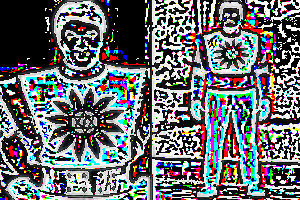

In [33]:
i3 = img - img_blur
cv2_imshow(i3)

In [ ]:
# Gaussian Blur (general uniform-distributed function is used 
# to distort the original image) and 
# Radial Blur (radial function -> x2+y2=r2), usually for Zoom effects 
# and Bilateral Blur -> dreamy affect 

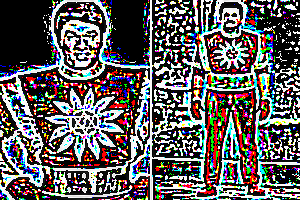

In [27]:
img_blur = cv2.blur(img, (5,5))
img_gblur = cv2.GaussianBlur(img, (5,5), 0)

# if both are same -> then img_blur - gaussian_blur should be 0! 
diff = img_blur-img_gblur

cv2_imshow(diff)

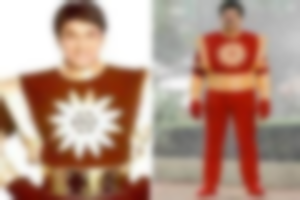

In [29]:
# BLur is applied in many continuous loops -> each loop adding a little blur
img2 = cv2.GaussianBlur(img, (5,5), 0)
# y = x * blur
for i in range(10): # y = x * blur**10
  img2 = cv2.GaussianBlur(img2, (5,5), 0)
# total equation above 
# y1 = input * blur -> before for loop
# y2 = y1 * blur**10  -> for loop
# y2 = input * blur**11 -> final equation
cv2_imshow(img2)

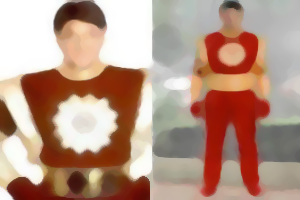

In [36]:
img2 = cv2.medianBlur(img,5) # only square windows to calculate 
for i in range(10): # y = x * blur**10
  img2 = cv2.medianBlur(img2,5)
cv2_imshow(img2)


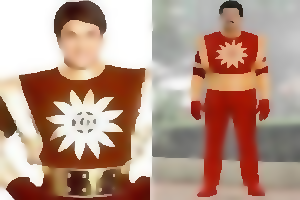

In [37]:
img2 = cv2.bilateralFilter(img,5,75,75) # only square windows to calculate 
for i in range(10): # y = x * blur**10
  img2 = cv2.bilateralFilter(img2,5,75,75) # TV and photo sensoring 
cv2_imshow(img2)

In [ ]:
# Convolutions

In [38]:
# upload a pic
!ls

sample_data  snek.jpg


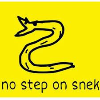

In [51]:
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('snek.jpg')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

In [53]:
# importing a deep learning model to show you how these convolutions look like in production 
import tensorflow as tf # open source library for scientific methods and vector math 
from tensorflow import keras
from keras.models import Model 

model=Model(inputs=model.inputs,outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() # a type of deeplearning model used in Object Detection,Activity Detection,Image Classification 
kernels, biases = model.layers[1].get_weights()

kernels[0]

array([[[ 0.42947057,  0.11727387,  0.03401296,  0.35422093,
         -0.0865837 ,  0.22968295,  0.06683242,  0.04133838,
          0.13026784,  0.03291035,  0.09615457, -0.09222532,
         -0.15587331,  0.0522968 , -0.08324417,  0.15728769,
          0.0291196 ,  0.05094835,  0.19055748, -0.04372229,
          0.3618031 ,  0.23902874,  0.16667192, -0.18046746,
          0.04404821,  0.09592837, -0.04381131, -0.1884835 ,
         -0.04399502, -0.18985446, -0.23386982,  0.12836744,
         -0.11059975,  0.00571336, -0.24479656, -0.30530283,
          0.060938  , -0.32816252,  0.1711953 ,  0.10265407,
         -0.11063665,  0.33012986, -0.05869728,  0.18478717,
          0.01050853,  0.10668027, -0.13086924, -0.36283946,
          0.06440807,  0.09335972,  0.00401619,  0.37814805,
          0.05268804, -0.27078936,  0.11060741, -0.11819526,
          0.04298935,  0.35323623, -0.28468162, -0.20289008,
         -0.284944  , -0.13224158, -0.05334752,  0.00757738],
        [ 0.55037946,  

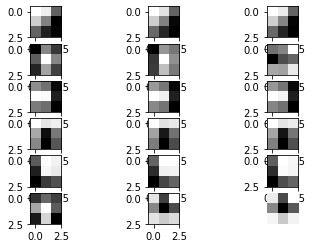

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() 
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels-fmin)/(fmax - fmin) # Zscore, MinMax normalizing 
n_filters, ix=6,1 

for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.axis('off')
plt.show()

In [59]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  kernels, biases = layer.get_weights()
  print(layer.name)
  print(len(kernels[0][0]))

block1_conv1
3
block1_conv2
64
block2_conv1
64
block2_conv2
128
block3_conv1
128
block3_conv2
256
block3_conv3
256
block4_conv1
256
block4_conv2
512
block4_conv3
512
block5_conv1
512
block5_conv2
512
block5_conv3
512


In [60]:
# early lunch -> 12:30-1:40, 3-3:45 break 
# TRANSFER learning 
# parameters + shape, or just part of shape or just parameters
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and
# utilized only input and till the next layer's output
# PARTIAL SHAPE [beginning of VGG model was transferred to my model]

In [61]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('snek.jpg', target_size=(224,224)) # because it preserves the dimensions
# from image, convert to array of numbers to feed to NN
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape

(224, 224, 3)

In [62]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img)

In [63]:
featureMaps.shape

(1, 224, 224, 64)

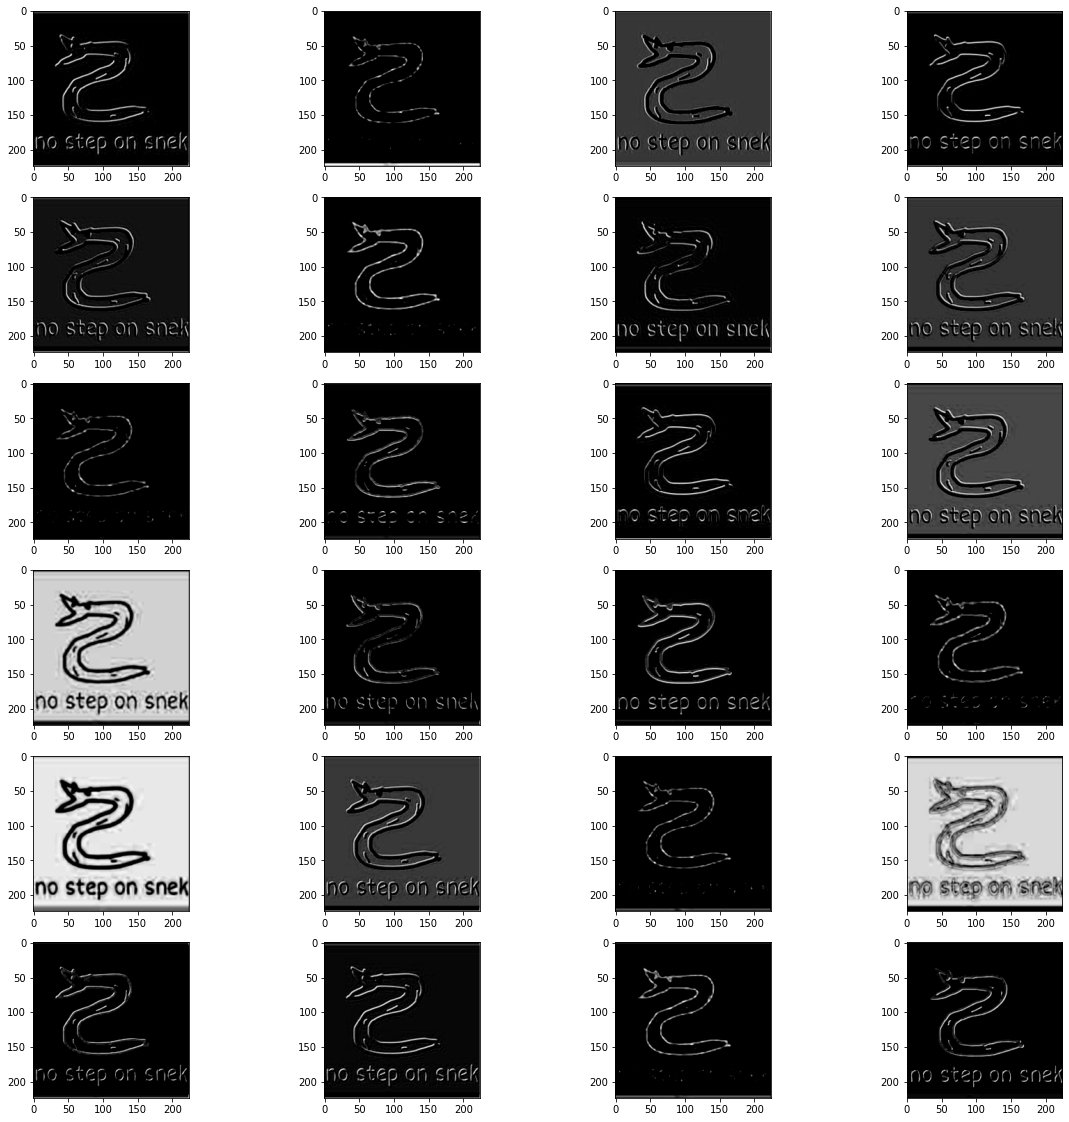

In [65]:
sz = 8
index = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0,:,:, index-1],cmap='gray') # plt.imshow(featureMaps[0,:,:, index-1])
  index=index + 1
plt.show()